In [1]:
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy import stats
from math import log

In [2]:
# read in data
'''
Note: Column 0 is date, column 1 is nominal SP500 price, column 6 is real SP500 price
Column 3 is nominal earnings, so PE is col1/col3
'''
pdata = pd.read_csv('shiller/data.csv', sep=',', parse_dates=['Date'])
data = pdata.values
# convert dates to ordinate dates, i.e. days since year 0
orddates = [x.toordinal() for x in data[..., 0]]
# use log of prices for fitting data
prices = data[..., 6].tolist()
logprices = [log(x, 2) for x in prices]
pe_ratio = [p/e for p,e in zip(data[..., 1], data[..., 3])]

In [3]:
# select date range
startDate = '01/01/1965'
endDate = '01/01/2015'
startTM = pd.Timestamp(startDate)
endTM = pd.Timestamp(endDate)
startOrddate = startTM.toordinal()
endOrddate = endTM.toordinal()
print(startTM, endTM)
print(startOrddate, endOrddate)

# find the beginningn and ending ord-date closest to the desired
begOrd = min(orddates, key=lambda x: abs(x - startOrddate))
endOrd = min(orddates, key=lambda x: abs(x - endOrddate))
begIdx = orddates.index(begOrd)
endIdx = orddates.index(endOrd)

# create the subset of the data for the date range
suborddates = orddates[begIdx:endIdx+1]
sublogprices = logprices[begIdx:endIdx+1]
sub_pe_ratio = pe_ratio[begIdx:endIdx+1]

subdates = [datetime.datetime.fromordinal(x) for x in suborddates]
subprices = [2**x for x in sublogprices]
 

1965-01-01 00:00:00 2015-01-01 00:00:00
717337 735599


In [4]:
gradient, intercept, r_value, p_value, std_err = stats.linregress(suborddates, sublogprices)
print(gradient, intercept, r_value, p_value, std_err)

0.00012157453717332986 -78.67762477508634 0.7786053313545477 2.4983944922952622e-123 4.003457428550005e-06


In [5]:
# 1 year is 365 days
daily_rise = 2**gradient
# print(daily_rise)
annual_log_gradient = gradient * 365
avg_annual_return = 2**annual_log_gradient - 1
# print(annual_log_gradient)
print("avg_annual_return: ", avg_annual_return)

avg_annual_return:  0.031236123317650133


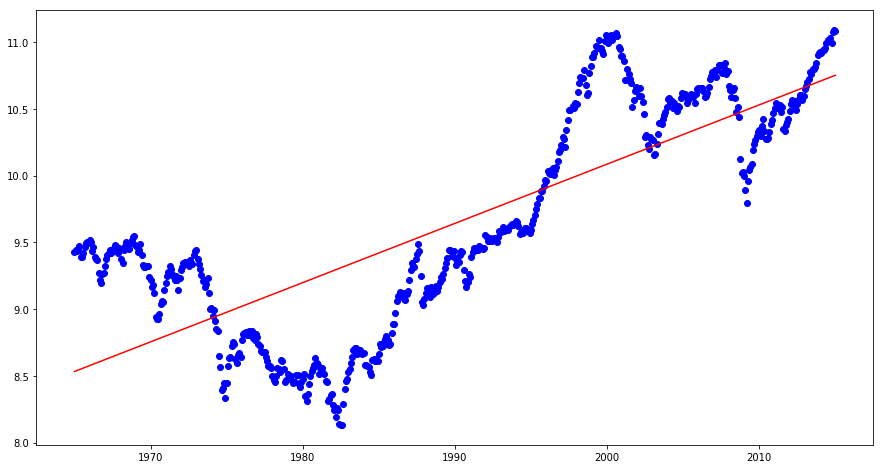

In [6]:
x = suborddates
y = sublogprices
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.figure(1, figsize=(15,8))
plt.plot(subdates,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

In [7]:
# final expected S&P 500 value at end of date range
expected_sp_end_price = 2**y1[-1]
print("Expected end date S&P price:", expected_sp_end_price)

# project forward n years
yrs = 4
expected_today_price = expected_sp_end_price * (1+avg_annual_return)**yrs
print("Expected today price", expected_today_price)

Expected end date S&P price: 1725.1226194641415
Expected today price 1950.9783043390967


In [8]:
'''
Notes:
All returns don't include dividends

From 1920 to 2015:
    - Nominal rate of return was 6.3%
        - 2015-01 expected price SP500: 1579
        - 2019-01 epxected price SP500: 2019
    - Real rate of return was 2.7%
        - 2015-01 expected price 1594
        - 2019-01 epxected price 1775

From 1950 to 2015:
    - Nominal rate of return was 7.1%
        - 2015-01 expected price 1978
        - 2019-01 epxected price 2606
    - Real rate of return was 2.8%
        - 2015-01 expected price 1640
        - 2019-01 epxected price 1831

From 1965 to 2015:
    - Nominal rate of return was 7.6%
        - 2015-01 expected price 2140
        - 2019-01 epxected price 2872
    - Real rate of return was 3.1%
        - 2015-01 expected price 1725
        - 2019-01 epxected price 1950
    
From 1980 to 2015:
    - Nominal rate of return was 8.3%
        - 2015-01 expected price 2385
        - 2019-01 epxected price 3285
    - Real rate of return was 5.2%
        - 2015-01 expected price 2320
        - 2019-01 epxected price 2843
'''

"\nNotes:\nAll returns don't include dividends\n\nFrom 1920 to 2015:\n    - Nominal rate of return was 6.3%\n        - 2015-01 expected price SP500: 1579\n        - 2019-01 epxected price SP500: 2019\n    - Real rate of return was 2.7%\n        - 2015-01 expected price 1594\n        - 2019-01 epxected price 1775\n\nFrom 1950 to 2015:\n    - Nominal rate of return was 7.1%\n        - 2015-01 expected price 1978\n        - 2019-01 epxected price 2606\n    - Real rate of return was 2.8%\n        - 2015-01 expected price 1640\n        - 2019-01 epxected price 1831\n\nFrom 1965 to 2015:\n    - Nominal rate of return was 7.6%\n        - 2015-01 expected price 2140\n        - 2019-01 epxected price 2872\n    - Real rate of return was 3.1%\n        - 2015-01 expected price 1725\n        - 2019-01 epxected price 1950\n    \nFrom 1980 to 2015:\n    - Nominal rate of return was 8.3%\n        - 2015-01 expected price 2385\n        - 2019-01 epxected price 3285\n    - Real rate of return was 5.2%\n

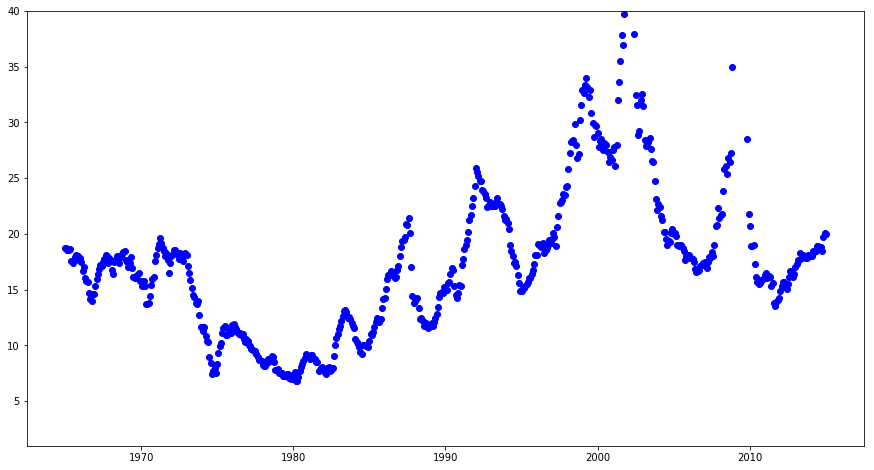

In [12]:
# plot PE Ratio over time
x = suborddates
y = sub_pe_ratio
plt.figure(1, figsize=(15,8))
plt.gca().set_ylim(40)
plt.gca().invert_yaxis()
plt.plot(subdates,y,'ob')
plt.show()